In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Aim -Business Understanding
The aim of this project is to answer the following four questions:

1. Which region are the lowest and highest prices of Avocado?
2. What is the highest region of avocado production?
3. What is the average avocado prices in each year?
4. What is the average avocado volume in each year?

In [2]:
df=pd.read_csv(r'C:\Users\ankus\OneDrive\Desktop\Naresh IT\22nd_April\avocado.csv')

In [3]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


# Data Understanding
This dataset contains 13 columns:

1. Date - The date of the observation
2. AveragePrice: the average price of a single avocado
3. Total Volume: Total number of avocados sold
4. Total Bags: Total number  o bags
5. Small Bags: Total number of Small bags
6. Large Bags: Total number of Large bags
7. XLarge Bags: Total number of XLarge bags
8. type: conventional or organic
9. year: the year
10. region: the city or region of the observation
11. 4046: Total number of avocados with PLU 4046 sold
12. 4225: Total number of avocados with PLU 4225 sold
13. 4770: Total number of avocados with PLU 4770 sold

# Explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Missing value checking

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Dropping unnecessary columns

In [6]:
df=df.drop(['Unnamed: 0','4046','4225','4770','Date'],axis=1)
df.head(2)

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


# Answering questions
* Which region are the lowest and highest prices of Avocado?
* What is the highest region of avocado production?
* What is the average avocado prices in each year?
* What is the average avocado volume in each year?

In [7]:
df.describe()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
lw_region=df[df.AveragePrice<=0.440000]
lw_reg_name=lw_region.region
lw_reg_name

15261    CincinnatiDayton
Name: region, dtype: object

In [9]:
hi_region=df[df.AveragePrice>=3.250000]
hi_reg_name=hi_region.region
hi_reg_name

14125    SanFrancisco
Name: region, dtype: object

In [10]:
def get_avarage(df,column):
    """
    Description: This function to return the average value of the column 
    Returns:
        column's average 
    """
    return sum(df[column])/len(df)

In [11]:
get_avarage(df,'AveragePrice')

1.4059784097758825

In [12]:
l1=list(df['region'].unique()) # All region name
l1

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico']

In [13]:
def get_avarge_between_two_columns(df,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset
    Returns:
        Sorted data for relation between column1 and column2
    """
    
    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= get_avarage(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

In [14]:
import seaborn as sns
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot
    Returns:
        None
    """
        
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));


In [15]:
# Which region are the lowest and highest prices of Avocado?
data1 = get_avarge_between_two_columns(df,'region','AveragePrice')
data1

,column1,column2
17,HartfordSpringfield,1.818639
42,SanFrancisco,1.804201
28,NewYork,1.727574
32,Philadelphia,1.632130
40,Sacramento,1.621568
7,Charlotte,1.606036
29,Northeast,1.601923
0,Albany,1.561036
8,Chicago,1.556775
37,RaleighGreensboro,1.555118


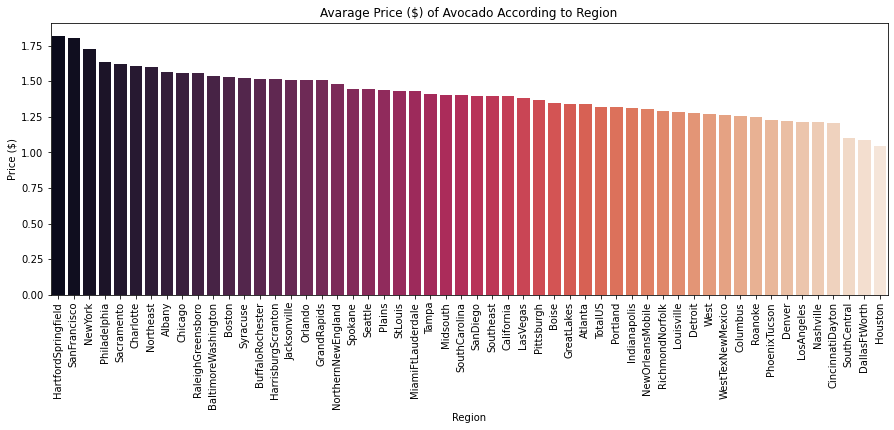

In [16]:
plot(data1,'Region','Price ($)')

# Usins SNS, simply we are able to craete the above grpah uing only two lines

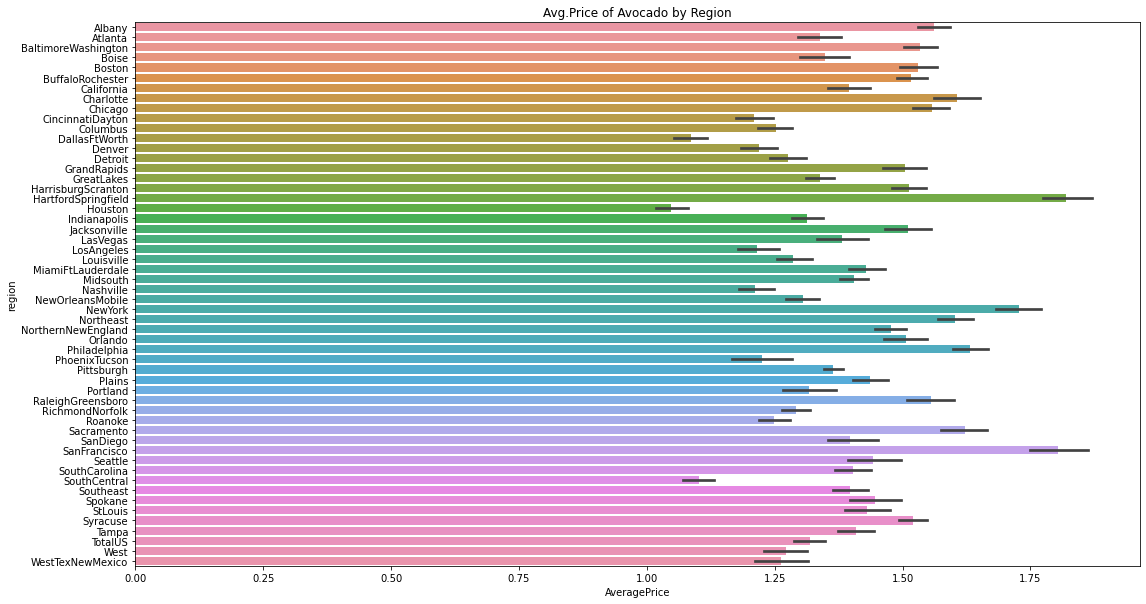

In [20]:
import seaborn as sns
plt.figure(figsize=(18,10))
plt.title("Avg.Price of Avocado by Region")
Av= sns.barplot(x="AveragePrice",y="region",data= df)

# What is the highest region of avocado production?

In [19]:
# Checking if there are outlier values or not.
data2 = get_avarge_between_two_columns(df,'region','Total Volume')
data2

,column1,column2
51,TotalUS,1.735130e+07
52,West,3.215323e+06
6,California,3.044324e+06
45,SouthCentral,2.991952e+06
29,Northeast,2.110299e+06
46,Southeast,1.820232e+06
15,GreatLakes,1.744505e+06
25,Midsouth,1.503992e+06
22,LosAngeles,1.502653e+06
35,Plains,9.206761e+05


Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

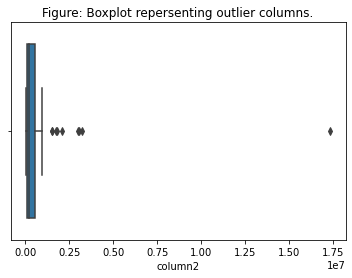

In [20]:
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")

In [21]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


In [22]:
# Remove the outlier values
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)

In [23]:
data2

,column1,column2
52,West,3.215323e+06
6,California,3.044324e+06
45,SouthCentral,2.991952e+06
29,Northeast,2.110299e+06
46,Southeast,1.820232e+06
15,GreatLakes,1.744505e+06
25,Midsouth,1.503992e+06
22,LosAngeles,1.502653e+06
35,Plains,9.206761e+05
28,NewYork,7.122311e+05


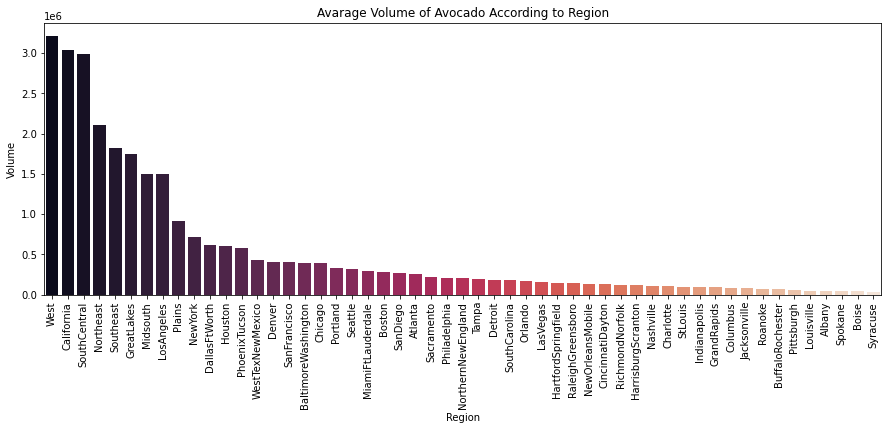

In [24]:
plot(data2,'Region','Volume')

# What is the average avocado prices in each year?

In [25]:
data3 = get_avarge_between_two_columns(df,'year','AveragePrice')
data3

,column1,column2
2,2017,1.515128
0,2015,1.375590
3,2018,1.347531
1,2016,1.338640


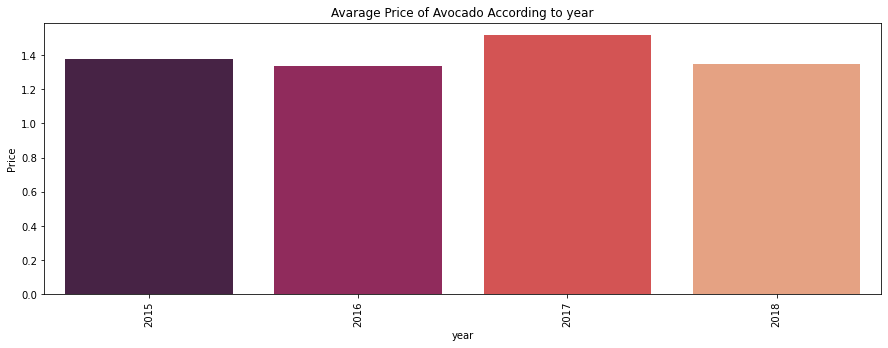

In [26]:
plot(data3,'year','Price')

# What is the average avocado volume in each year?

In [27]:
data4 = get_avarge_between_two_columns(df,'year','Total Volume')
data4

,column1,column2
3,2018,1.066928e+06
2,2017,8.623393e+05
1,2016,8.584206e+05
0,2015,7.810274e+05


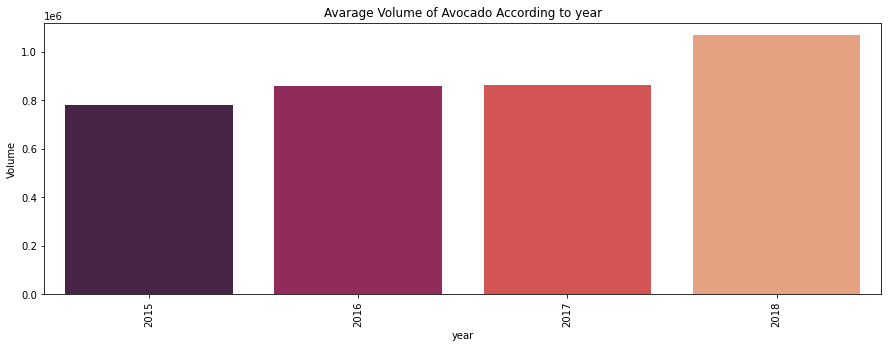

In [28]:
plot(data4,'year','Volume')

# Data Modeling
* We bulit the regrestion model by used Linear regresion from sklearn to predict the avocado price.

* Changing some column types to categories

In [29]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [31]:
df.head(2)

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0


In [32]:
# split data into X and y
X = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:

# split data into traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=15)

In [35]:
print("training set:",X_train.shape,' - ',y_train.shape[0],' samples')
print("testing set:",X_test.shape,' - ',y_test.shape[0],' samples')

training set: (14599, 8)  -  14599  samples
testing set: (3650, 8)  -  3650  samples


In [36]:
# bulid and fit the model
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(normalize=True)

# Evaluate the Results

In [37]:
# prediction and calculate the accuracy for the testing dataset
from sklearn.metrics import r2_score
test_pre = model.predict(X_test)
test_score = r2_score(y_test,test_pre)
print("The accuracy of testing dataset ",test_score*100)

The accuracy of testing dataset  37.970873918308655
